In [5]:
# Assignment 1

from numpy import pi, sin, cos, arange, radians
T = -2

# Store input numbers
R = float(input('ENTER THE RADIUS OF THE CIRCULAR CROSS-SECTION: '))
L = float(input('ENTER THE LENGTH OF THE LOG: '))
rel_rho_mat = float(input('ENTER THE RELATIVE DENSITY OF THE MATERIAL OF THE LOG: '))
rel_rho_liq = float(input('ENTER THE RELATIVE DENSITY OF THE LIQUID: '))

# Add two numbers
vol_log = pi*R**2*L/2
vol_liq = vol_log*rel_rho_mat/rel_rho_liq
area_segment = round((vol_liq/L), 3)

# Check if log sinks
if rel_rho_mat > rel_rho_liq:
    print('RELATIVE DENSITY OF MATERIAL IS MORE THAN LIQUID SO LOG SINKS')
    
# Find the draught
for i in arange(0, pi, 0.00001):
    a = (R**2)*(i-sin(i))/2
    a_round = round(a, 3)
    if a_round == area_segment:
        T = R * (1 - cos(i/2))
    else:
        continue
        
# Display the draught
print('THE DRAUGHT IS: ', T)


ENTER THE RADIUS OF THE CIRCULAR CROSS-SECTION: 1
ENTER THE LENGTH OF THE LOG: 1
ENTER THE RELATIVE DENSITY OF THE MATERIAL OF THE LOG: 1
ENTER THE RELATIVE DENSITY OF THE LIQUID: 1
THE DRAUGHT IS:  0.9999986732051035


LENGTH OF THE BEAM: 10
CHOOSE LOADING TYPE: 3
VALUE OF UDL: 5
UDL START POINT FROM LEFT END: 2
UDL END POINT FROM LEFT END: 9


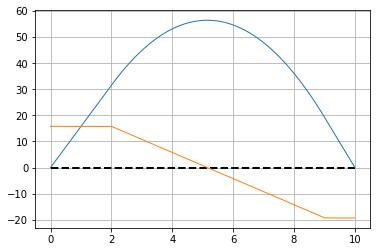

In [21]:
# Assignment 2

from matplotlib import pyplot as plt

# Store input numbers
l = float(input('LENGTH OF THE BEAM: '))
opt = int(input('CHOOSE LOADING TYPE: '))

# Declaring arrays
x = []
temp = 0
while temp<=l:
    x.append(temp)
    temp = temp + 0.001
SF = []
BM = []

# Concentrated load at mid-point
if opt==1:        
    c_load = float(input('VALUE OF CONCENTRATED LOAD: '))
    r = c_load/2
    for i in x:
        if i<(l/2):
            SF.append(c_load-r)
            BM.append(r*i)
        elif i==(l/2):
            SF.append(0)
            BM.append(r*i)
        else:
            SF.append(r-c_load)
            BM.append((r*i)-(c_load*(i-(l/2))))

# Concentrated load offset
elif opt==2:
    c_load = float(input('VALUE OF CONCENTRATED LOAD: '))
    d = float(input('DISTANCE OF CONCENTRATED LOAD FROM LEFT END: '))
    r_right = c_load*d/l
    r_left = c_load-r_right
    for i in x:
        if i<d:
            SF.append(r_left)
            BM.append(r_left*i)
        elif i==(d/2):
            SF.append(0)
            BM.append(r_left*i)
        else:
            SF.append(-r_left)
            BM.append((r_left*i)-(c_load*(i-d)))
            
# Uniformly distributed load
elif opt==3:
    w = float(input('VALUE OF UDL: '))
    d1 = float(input('UDL START POINT FROM LEFT END: '))
    d2 = float(input('UDL END POINT FROM LEFT END: '))
    r_left = w*(d2-d1)*(2*(l-d2)+(d2-d1))/(2*l)
    r_right = w*(d2-d1)-r_left
    for i in x:
        if i<=d1:
            SF.append(r_left)
            BM.append(r_left*i)
        elif i>d1 and i<d2:
            SF.append(r_left-(w*(i-d1)))
            BM.append((r_left*i)-(0.5*w*(i-d1)**2))
        else:
            SF.append(-r_right)
            BM.append(r_right*(l-i))

# Uniformly varying load         
elif opt==4:
    w = float(input('END VALUE OF UVL: '))
    W = w*l/2
    for i in x:
        SF.append((W/3)-(W*i**2/l**2))
        BM.append(W*i*(l**2-i**2)/(3*l**2))

plt.plot([0, l], [0, 0], label = "BEAM", linewidth = 2, linestyle = 'dashed', color = 'black' )
plt.plot(x, BM, label = "BENDING MOMENT DIAGRAM", linewidth = 1)
plt.plot(x, SF, label = "SHEAR FORCE DIAGRAM", linewidth = 1)
plt.legend()
plt.xlim(0, l)
plt.grid(color='gray', linestyle='dashed', linewidth = 0.8)
plt.show()


In [20]:
# Assignment 3

# Store input numbers
a = float(input('TOP FLANGE TOP LAND: '))
b = float(input('TOP FLANGE DEPTH: '))
c = float(input('TOP FLANGE BOTTOM LAND-LEFT: '))
c1 = float(input('TOP FLANGE BOTTOM LAND-RIGHT: '))
d = float(input('WEB THICKNESS: '))
e = float(input('BOTTOM FLANGE TOP LAND-LEFT: '))
e1 = float(input('BOTTOM FLANGE TOP LAND-RIGHT: '))
f = float(input('BOTTOM FLANGE DEPTH: '))
g = float(input('BOTTOM FLANGE BOTTOM LAND: '))
h = float(input('WEB HEIGHT: '))

# a. Calculate area
area = (a*b)+(d*h)+(f*g)

# b. Location of neutral axis from base line
centroid = ((a*b*(f+h+(b/2)))+(d*h*(f+(h/2)))+(f*g*(f/2)))/area

# c. Second moment of area, I-xx
disp_1 = a*b*((f+h+(b/2)-centroid)**2)
disp_2 = d*h*((f+(h/2)-centroid)**2)
disp_3 = f*g*(((f/2)-centroid)**2)
Ixx = ((a*b**3/12)+disp_1) + ((d*h**3/12)+disp_2) + ((g*f**3/12)+disp_3)
         
# Print result
print('THE AREA IS: ', area)
print('THE NEUTRAL AXIS FROM BASE LINE IS: ', centroid)
print('THE SECOND MOMENT OF AREA, I-xx IS: ', Ixx)


TOP FLANGE TOP LAND: 10
TOP FLANGE DEPTH: 10
TOP FLANGE BOTTOM LAND-LEFT: 10
TOP FLANGE BOTTOM LAND-RIGHT: 10
WEB THICKNESS: 10
BOTTOM FLANGE TOP LAND-LEFT: 10
BOTTOM FLANGE TOP LAND-RIGHT: 10
BOTTOM FLANGE DEPTH: 10
BOTTOM FLANGE BOTTOM LAND: 10
WEB HEIGHT: 10
THE AREA IS:  300.0
THE NEUTRAL AXIS FROM BASE LINE IS:  15.0
THE SECOND MOMENT OF AREA, I-xx IS:  22500.0


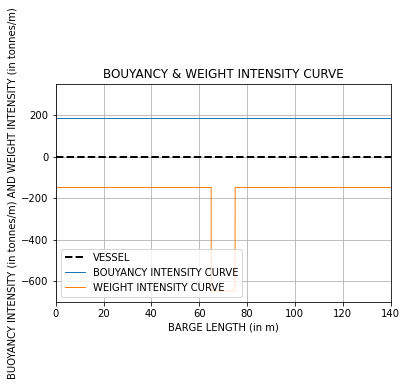

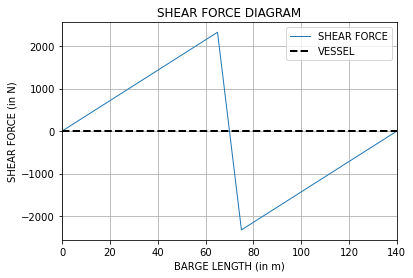

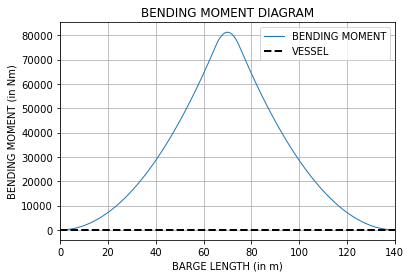

In [14]:
# Assignment 4

from matplotlib import pyplot as plt

# Store input numbers
l = 140
b = 20
t = 13
disp_total = 25830
disp_distributed = 20830
disp_midship = disp_total - disp_distributed

B = disp_total/(l)
W1 = disp_distributed/(l)
W2 = W1 + (disp_midship/10)

# Declaring arrays
x = []
temp = 0
while temp <= l:
    x.append(temp)
    temp = temp + 0.01
SWB = []
WIC = []
SF = []
BM = []

# Calculate buoyancy and weight distribution and, SFD and BMD
for i in x:
    if i < 65:
        SWB.append(B)
        WIC.append(-W1)
        SF.append((B*i)-(W1*i))
        BM.append(((B*i)-(W1*i))*i/2)
    elif i >= 65 and i <= 75:
        SWB.append(B)
        WIC.append(-W2)
        SF.append((B*i)-(W1*65)-(W2*(i-65)))
        BM.append((B*i**2/2)-(W1*65*(i-32.5))-(W2*0.5*(i-65)**2))
    else:
        SWB.append(B)
        WIC.append(-W1)
        SF.append((B*i)-(W1*i)-disp_midship)
        BM.append((B*i**2/2)-(W1*i**2/2)-(disp_midship*(i-70)))

# Plotting graph
plt.figure()
plt.plot([0, l], [0, 0], label = "VESSEL", linewidth = 2, linestyle = 'dashed', 
         color = 'black' )
plt.plot(x, SWB, linewidth = 1, label = 'BOUYANCY INTENSITY CURVE')
plt.plot(x, WIC, linewidth = 1, label = 'WEIGHT INTENSITY CURVE')
plt.title("BOUYANCY & WEIGHT INTENSITY CURVE")
plt.xlabel("BARGE LENGTH (in m)")
plt.ylabel("BUOYANCY INTENSITY (in tonnes/m) AND WEIGHT INTENSITY (in tonnes/m)")
plt.legend()
plt.xlim(0, l)
plt.ylim(-700,350)
plt.grid()

plt.figure()
plt.plot(x, SF, linewidth = 1, label = 'SHEAR FORCE')
plt.plot([0, l], [0, 0], label = "VESSEL", linewidth = 2, linestyle = 'dashed', 
         color = 'black' )
plt.title("SHEAR FORCE DIAGRAM")
plt.xlabel("BARGE LENGTH (in m)")
plt.ylabel("SHEAR FORCE (in N)")
plt.legend()
plt.xlim(0, l)
plt.grid()

plt.figure()
plt.plot(x, BM, linewidth = 1, label = 'BENDING MOMENT')
plt.plot([0, l], [0, 0], label = "VESSEL", linewidth = 2, linestyle = 'dashed', 
         color = 'black' )
plt.title("BENDING MOMENT DIAGRAM")
plt.xlabel("BARGE LENGTH (in m)")
plt.ylabel("BENDING MOMENT (in Nm)")
plt.legend()
plt.xlim(0, l)
plt.grid()

plt.show()

In [4]:
# Assignment 5

from numpy import insert, array, arange, sum

# Store the scantlings
l = array([12, 12, 0.028, 20, 20, 0.012])
t = array([0.022, 0.016, 13, 0.018, 0.02, 1.46])
s = array([12.989, 9.97, 6.5, 1.491, 0.01, 0.751])

area = array([])
moment = array([])
I_local = array([])
Ay2 = array([])

# Location of neutral axis from base line
for i in arange(0, 6, 1):
    area = insert(area, i, (l[i]*t[i]))
    moment = insert(moment, i, (l[i]*t[i]*s[i]))
na = sum(moment)/sum(area)

# Second moment of area, I-xx
for i in arange(0, 6, 1):
    I_local = insert(I_local, i, (l[i]*t[i]**3/12))
    Ay2 = insert(Ay2, i, (area[i]*(s[i]-na)**2))
Ixx = sum(I_local)+sum(Ay2)

# Section Modulus
z_deck = Ixx/(s[0]-na)
z_keel = Ixx/(na-s[4])

# Bending Stress
BM = 81250
BS_deck = BM*(s[0]-na)/Ixx
BS_keel = BM*(na-s[4])/Ixx

# Display Results
print('SECOND MOMENT OF AREA WRT NA: ', na)
print('SECTION MODULUS WRT DECK: ', z_deck)
print('SECTION MODULUS WRT KEEL: ', z_keel)
print('BENDING STRESS WRT DECK: ', BS_deck)
print('BENDING STRESS WRT KEEL: ', BS_keel)


SECOND MOMENT OF AREA WRT NA:  5.172550903901046
SECTION MODULUS WRT DECK:  5.399141539245674
SECTION MODULUS WRT KEEL:  8.174663221675438
BENDING STRESS WRT DECK:  15048.68864974257
BENDING STRESS WRT KEEL:  9939.247378969994


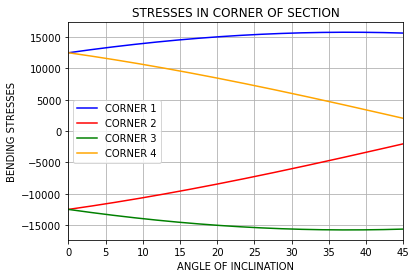

In [17]:
# Assignment 6

from numpy import linspace, zeros
import matplotlib.pyplot as plt
from math import sin, cos

# Store input numbers
a = 12513.75838
b = 9632.70616
k = 0.0174533

# Declaring arrays
t = linspace(0, 45, 460)
y1 = zeros(len(t))
y2 = zeros(len(t))
y3 = zeros(len(t))
y4 = zeros(len(t))

# Calculate stress values
for i in range(len(t)):
    y1[i] = a*cos(t[i]*k)+b*sin(t[i]*k)
    y2[i] = -a*cos(t[i]*k)+b*sin(t[i]*k)
    y3[i] = -a*cos(t[i]*k)-b*sin(t[i]*k)
    y4[i] = a*cos(t[i]*k)-b*sin(t[i]*k)
    
# Plotting graph
plt.plot(t, y1, label="CORNER 1", c='blue')
plt.plot(t, y2, label="CORNER 2", c='red')
plt.plot(t, y3, label="CORNER 3", c='green')
plt.plot(t, y4, label="CORNER 4", c='orange')

plt.title('STRESSES IN CORNER OF SECTION')
plt.xlabel("ANGLE OF INCLINATION")
plt.ylabel("BENDING STRESSES")
plt.legend()
plt.xlim([0, 45])

plt.grid()
plt.show()


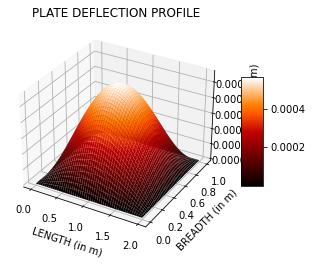

In [7]:
# Assignment 7

from matplotlib import pyplot as plt
from numpy import linspace, sin, pi, meshgrid

# Store input numbers
D = 1172.161172
a = 2
b = 1
P = 100
const = P/((pi**4)*D*1.25)

# Declare arrays and form a mesh
x = [i for i in linspace(0, 2, 200)]
y = [j for j in linspace(0, 1, 100)]
X,Y=meshgrid(x,y)
Z = f(X, Y)

# Calculate the plate deflection
def f(x,y):
    w = P*sin(pi*x/a)*sin(pi*y/b)/((pi**4)*D*(((1/(a**2))+(1/(b**2)))**2))
    return w

# Plot the 3-D deflection of plate
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('PLATE DEFLECTION PROFILE')
plt.xlabel("LENGTH (in m)")
plt.ylabel("BREADTH (in m)")
ax.set_zlabel("DEFLECTION (in m)")
surf1 = ax.plot_surface(X, Y, Z, cmap='gist_heat')
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)

plt.show()


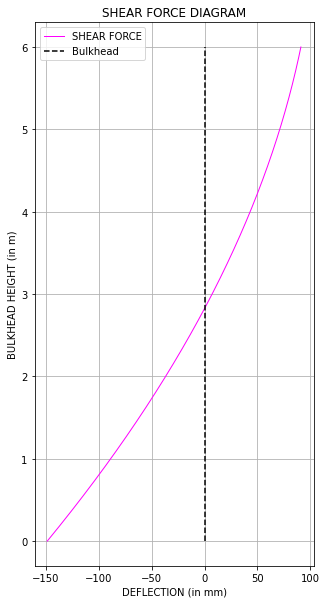

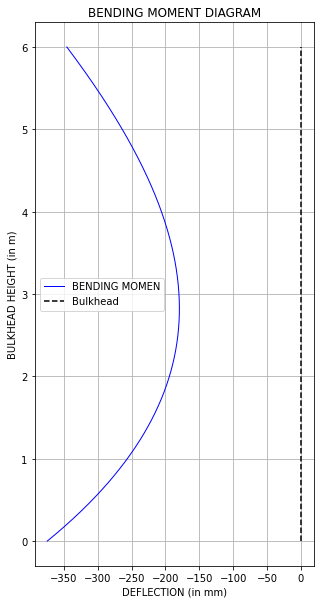

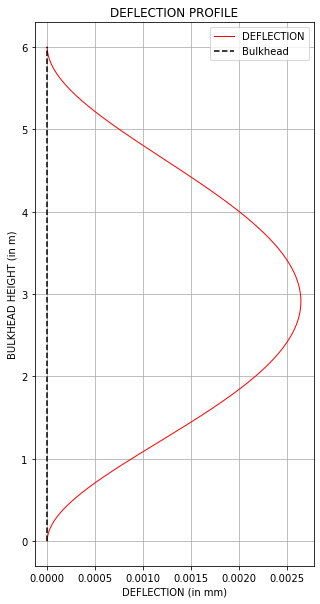

In [19]:
# Assignment 8

from matplotlib import pyplot as plt
from numpy import arange

# Store input values and declare arrays
s, e, h, l, w = 0.8, 200*1000000000, 2, 6, 10000
i = l*s**3/12
temp = 0
xx = arange(0,6,0.001)
F, M, y = [], [], []

# Calculate the SF, BM and deflection values
for x in xx:
    x = l - x
    val1 = -((w*s)*(((x**2)/2)+(h*x)-(3*(l**2)/20)-(h*l/2)))
    F.append(val1/1000)
    val2 = -((w*s)*((x**3/6)+(h*x**2/2)-(((3*l**2/20)+(h*l/2))*x)+(l**3/30)+(h*l**2/2)))
    M.append(val2/1000)
    val3 = (w*s/(e*i))*((x**5/120)+(h*x**4/24)-((3*l**2/20)+(h*l/2))*(x**3/6)+((l**3/30)
                                                        +(h*l**2/12))*(x**2/2))
    y.append(val3 * 1000)

# Plot the SFD, BMD and deflection profile
plt.figure(figsize=(5,10))
plt.plot(F, xx, label="SHEAR FORCE", linewidth='1', color='magenta')
plt.title("SHEAR FORCE DIAGRAM")
plt.xlabel("DEFLECTION (in mm)")
plt.ylabel("BULKHEAD HEIGHT (in m)")
plt.plot([0, 0], [0, 6], color='black', linestyle='dashed', label='Bulkhead')
plt.grid()
plt.legend()

plt.figure(figsize=(5,10))
plt.plot(M, xx, label="BENDING MOMEN", linewidth='1', color='blue')
plt.title("BENDING MOMENT DIAGRAM")
plt.xlabel("DEFLECTION (in mm)")
plt.ylabel("BULKHEAD HEIGHT (in m)")
plt.plot([0, 0], [0, 6], color='black', linestyle='dashed', label='Bulkhead')
plt.grid()
plt.legend()

plt.figure(figsize=(5,10))
plt.plot(y, xx, label="DEFLECTION", linewidth='1', color='red')
plt.title("DEFLECTION PROFILE")
plt.xlabel("DEFLECTION (in mm)")
plt.ylabel("BULKHEAD HEIGHT (in m)")
plt.plot([0, 0], [0, 6], color='black', linestyle='dashed', label='Bulkhead')
plt.grid()
plt.legend()

plt.show()
